# 1. Import Required Libraries

In [1]:
#import necessary libraraies

#data science and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import zipcodes as zcode

#machine learning modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc, confusion_matrix, classification_report, jaccard_score, log_loss
from sklearn.model_selection import cross_val_score

# 2. Import and Read Dataset

In [2]:
# Import data
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df = pd.DataFrame(data)

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [4]:
# Get the shape of the DataFrame
rows, cols = df.shape

# Print informative text about the shape
print(f"The bank dataset has {rows} rows and {cols} columns.")

The bank dataset has 5000 rows and 14 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


#### This dataset contains information about 5,000 individuals and aims to predict a specific classification outcome (personal loan). Let's see the features description: <br><br>
#### ID: Unique identifier for each individual.<br><br>
### Demographic Information:<br>

#### Age: Age of the individual in years .<br>Experience: Work experience in years .<br> ZIP Code: Numerical representation of the individual's ZIP code .<br>Family: Family size or number of dependents .<br>Education: Educational attainment level .<br>


### Financial Information:<br><br>
#### Income: Annual income of the individual .<br> Mortgage:   an indicator of having a mortgage .<br> Personal Loan:   an indicator of having a personal loan .<br> Securities Account:   an indicator of having a securities account .<br> CD Account:   an indicator of having a certificate of deposit account .<br>
#### CCAvg: This feature name is "CCAvg" but the data type is "object." It represents an average spending on credit card per month.<br> Online: Potentially an indicator of internet usage or online banking activity .<br> CreditCard:   an indicator of having a credit card .<br><br>
### Notes:<br> All features except "CCAvg" are numerical data types (int64).

# 3. Data Cleaning

## 3.1. Checking for missing values

In [6]:
# Check for Missing Values
print("Missing Values:")
print(df.isnull().sum())  # Count missing values per column

Missing Values:
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


## 3.2. Checking for duplicate values

In [7]:
# Check for Duplicate Rows
print("\nDuplicate Rows:")
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")



Duplicate Rows:
Number of duplicate rows: 0


### There are no missing or duplicate values. so we can proceed with further analysis.

## 3.3. Deeper details of the dataframe

In [8]:
# Descriptive Statistics for numerical columns
print("\nDescriptive Statistics for numerical columns:")
print(df.describe(exclude='object'))


Descriptive Statistics for numerical columns:
                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.881000    56.498800       0.096000   
std       1.147663     0.839869   101.713802       0.294621   
min       1.000000     1.

### According to info of the dataframe, the only object type feature is CCAvg. Let's investigate it with more details.

In [9]:
# Explore CCAvg (object type)
print("Unique Values in CCAvg:")
unique_values = df['CCAvg'].unique()
print(f"Number of unique values: {len(unique_values)}")
print(f"Unique values:\n{unique_values}")

Unique Values in CCAvg:
Number of unique values: 108
Unique values:
['1/60' '1/50' '1/00' '2/70' '0/40' '0/30' '0/60' '8/90' '2/40' '0/10'
 '3/80' '2/50' '2/00' '4/70' '8/10' '0/50' '0/90' '1/20' '0/70' '3/90'
 '0/20' '2/20' '3/30' '1/80' '2/90' '1/40' '5/00' '2/30' '1/10' '5/70'
 '4/50' '2/10' '8/00' '1/70' '0/00' '2/80' '3/50' '4/00' '2/60' '1/30'
 '5/60' '5/20' '3/00' '4/60' '3/60' '7/20' '1/75' '7/40' '2/67' '7/50'
 '6/50' '7/80' '7/90' '4/10' '1/90' '4/30' '6/80' '5/10' '3/10' '0/80'
 '3/70' '6/20' '0/75' '2/33' '4/90' '0/67' '3/20' '5/50' '6/90' '4/33'
 '7/30' '4/20' '4/40' '6/10' '6/33' '6/60' '5/30' '3/40' '7/00' '6/30'
 '8/30' '6/00' '1/67' '8/60' '7/60' '6/40' '10/00' '5/90' '5/40' '8/80'
 '1/33' '9/00' '6/70' '4/25' '6/67' '5/80' '4/80' '3/25' '5/67' '8/50'
 '4/75' '4/67' '3/67' '8/20' '3/33' '5/33' '9/30' '2/75']


#### According to the explanations of data owner, the values in CCAvg column are actually decimal numbers and are continuous. So we need to handle them and make them readable for the machine learning model. We need to convert this symbol "/" to "."

In [10]:
#let's convert the CCAvg column into float for better handling
# Define separator
separator = "/"

def convert_to_numeric(df, separator):
      """Converts the specified column to float, handling potential errors.

      Args:
          df: A pandas DataFrame containing the column to convert.
          separator: The separator symbol used in the string values.

      Returns:
          A DataFrame with a new column containing the converted values.
      """

      try:
        # Option 2: Using vectorized string methods (more efficient for large datasets)
        df['CCAvg'] = pd.to_numeric(df['CCAvg'].str.replace(separator, '.', regex=True), errors='coerce')

        print("CCAvg successfully converted to numeric.")
      except Exception as e:
        print(f"Error converting CCAvg: {e}")
        # Log specific errors for further investigation

      return df

df = convert_to_numeric(df.copy(), separator)
print(df.head())



CCAvg successfully converted to numeric.
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


#### Now, the issue with the CCAvg column has resolved and we can go on with further analysis. Another issue with the dataframe is in experience column. The minimum for this is reported as a negative number which doesn't make sense and needs to be changed to a positive value. Let's investigate it further and convert it into positive value.

In [11]:
# To make the code more readable, we define a function for converting to correct values
def fix_negative_experience(df):
  """
  Counts the number of rows with negative experience and converts them to positive.

  Args:
      df: A pandas DataFrame containing the 'experience' column.

  Returns:
      A DataFrame with the 'experience' column modified (negative to positive).
  """

  # Count rows with negative experience
  num_negative = df['Experience'].lt(0).sum()
  print(f"Number of rows with negative experience: {num_negative}")

  # Fix negative values by converting them to absolute values
  df['Experience'] = df['Experience'].abs()
    
  print('Corrected the Experience column. See the details below: ')
  # Get descriptive statistics for the 'Experience' column and print
  print(df['Experience'].describe()) 

  return df


df = fix_negative_experience(df.copy())


Number of rows with negative experience: 52
Corrected the Experience column. See the details below: 
count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64


#### Great. Now, we can move on to other columns. The ID column will not help us in analysis due to so many unique values (one for each client) so we remove it.

In [12]:
def remove_id_column(df):
    df = df.drop('ID', axis=1)

    print(f"Successfully removed the 'ID' column.")
    print(df.columns)

    return df

df = remove_id_column(df.copy())

Successfully removed the 'ID' column.
Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


#### Now, let's check the potential outliers and noises. Before visualization of the data distribution, I check out the details of the categorical and continuous columns seperately and then visualize the data points in each type.  

In [13]:
def column_types(df):
  """
  Analyzes features and calls visualization functions for categorical and continuous data.

  Args:
      df: A pandas DataFrame containing the data.
  """

  # Print number of unique values in each column
  print('See the number of unique values for each column below:')
  print(df.nunique())


column_types(df)

See the number of unique values for each column below:
Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64


#### Based on the information above, 7 columns have small number of unique values and others have large numbers. So, we divide the column types and visualize them seperately.

In [14]:
def categorize_features(df, threshold=5):
    """
    Analyzes features and categorizes them as 'categorical' or 'continuous' based on unique value counts.

    Args:
        df: A pandas DataFrame containing the data.
        threshold: The minimum number of unique values for a feature to be considered continuous (default=5).

    Returns:
        A tuple containing two lists: categorical features and continuous features.
    """

    categorical_features = []
    continuous_features = []
    for col in df.columns:
        num_unique_values = df[col].nunique()
        if num_unique_values <= threshold:
            categorical_features.append(col)
        else:
            continuous_features.append(col)

    return categorical_features, continuous_features


In [15]:
categorical_features, continuous_features = categorize_features(df.copy())

In [16]:
import math
def visualize_categorical_features(df, categorical_features):
  """
  This function visualizes the distribution of categorical features in a dataframe
  using subplots for countplots and pie charts.

  Args:
      df (pandas.DataFrame): The dataframe containing the data.
      categorical_features (list): A list of feature names that are categorical.
  """
  num_features = len(categorical_features)
  num_rows, num_cols = (math.ceil(num_features / 2), 2)  # Subplot layout

  # Create a figure for subplots
  fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))  # Adjust figsize as needed

  # Iterate through features and create subplots
  feature_index = 0
  for i in range(num_rows):
    for j in range(num_cols):
      if feature_index >= num_features:
        axes[i, j].axis('off')  # Hide extra subplots
        continue

      feature_name = categorical_features[feature_index]
      feature_data = df[feature_name]

      # Countplot for categorical features
      sns.countplot(x=feature_name, data=df, ax=axes[i, j])
      axes[i, j].set_title(f"Distribution of {feature_name} (Countplot)")


      feature_index += 1

  # Adjust layout and display the plot
  fig.suptitle("Distribution of Categorical Features", fontsize=14)
  plt.tight_layout()
  plt.show()

def visualize_continuous_features(df, continuous_features):
    """
    Visualizes continuous features using box plots and outlier annotations.

    Args:
        df: A pandas DataFrame containing the data.
        continuous_features: A list of continuous feature names.
    """

    if not continuous_features:
        print("No continuous features found for visualization.")
        return

    fig, axes = plt.subplots(len(continuous_features) // 2, 2, figsize=(12, 8))
    axes = axes.ravel()  # Flatten the axes for iteration

    for i, col in enumerate(continuous_features):
        df.boxplot(column=col, vert=False, ax=axes[i])  # Box plot (horizontally)
        axes[i].set_title(col)
        axes[i].set_xlabel(col)

        # Annotate potential outliers (1.5x IQR above Q3 or below Q1)
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + (1.5 * iqr)
        lower_bound = q1 - (1.5 * iqr)

        outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
        for outlier in outliers.index:
            axes[i].annotate(outlier, (df.loc[outlier, col], 0), fontsize=8, alpha=0.7)

    plt.tight_layout()
    plt.show()


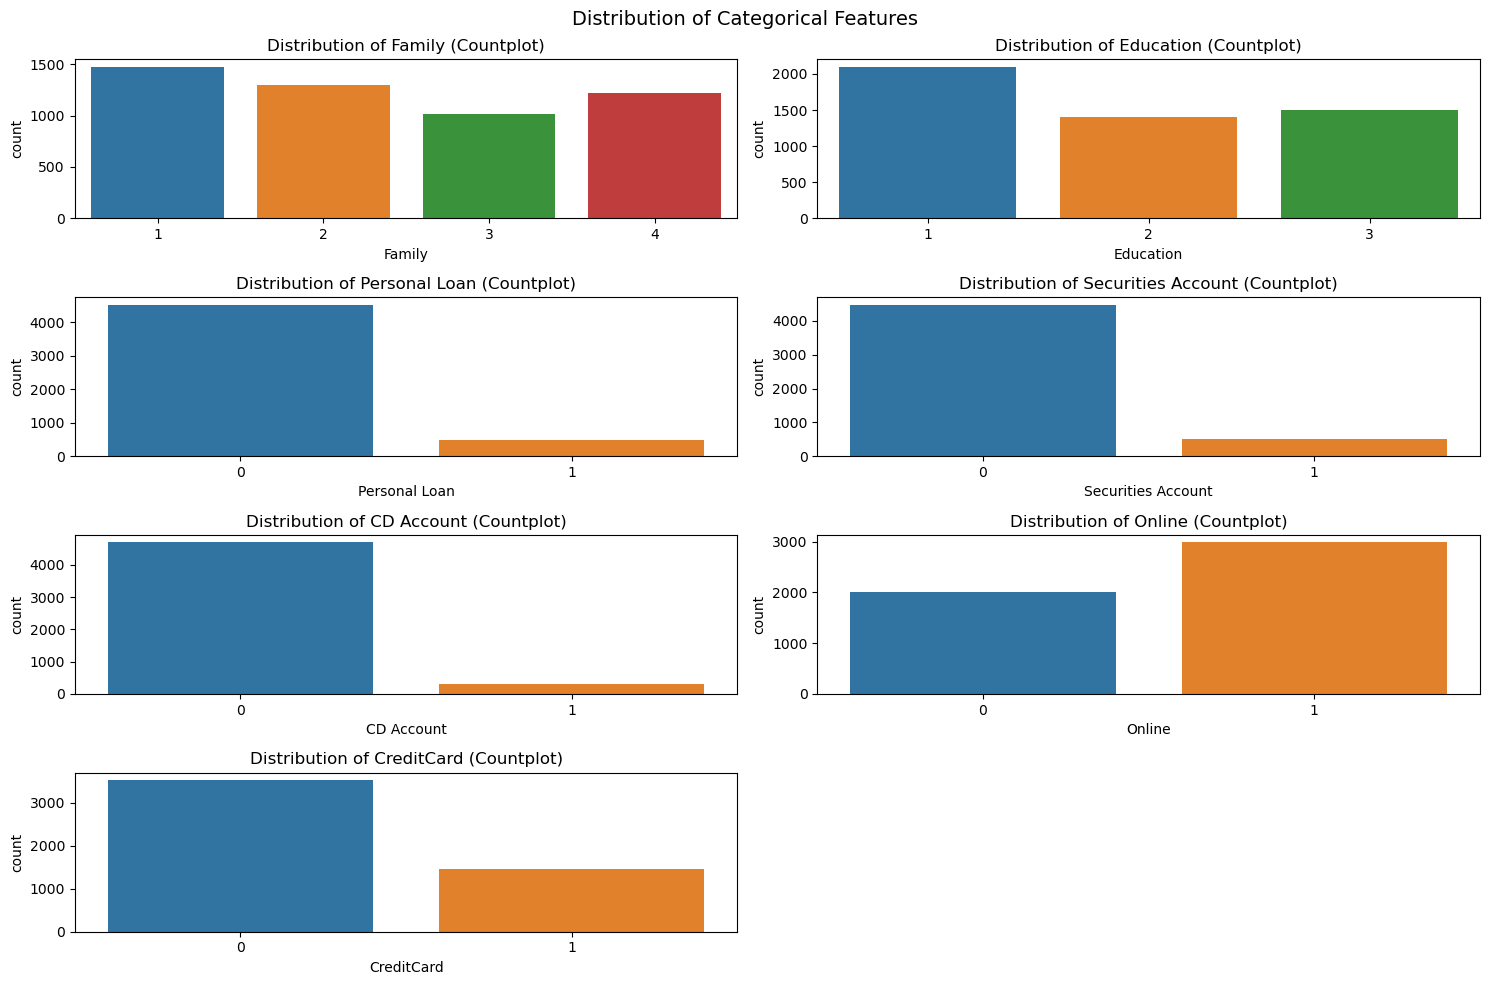

In [17]:
visualize_categorical_features(df.copy(), categorical_features)

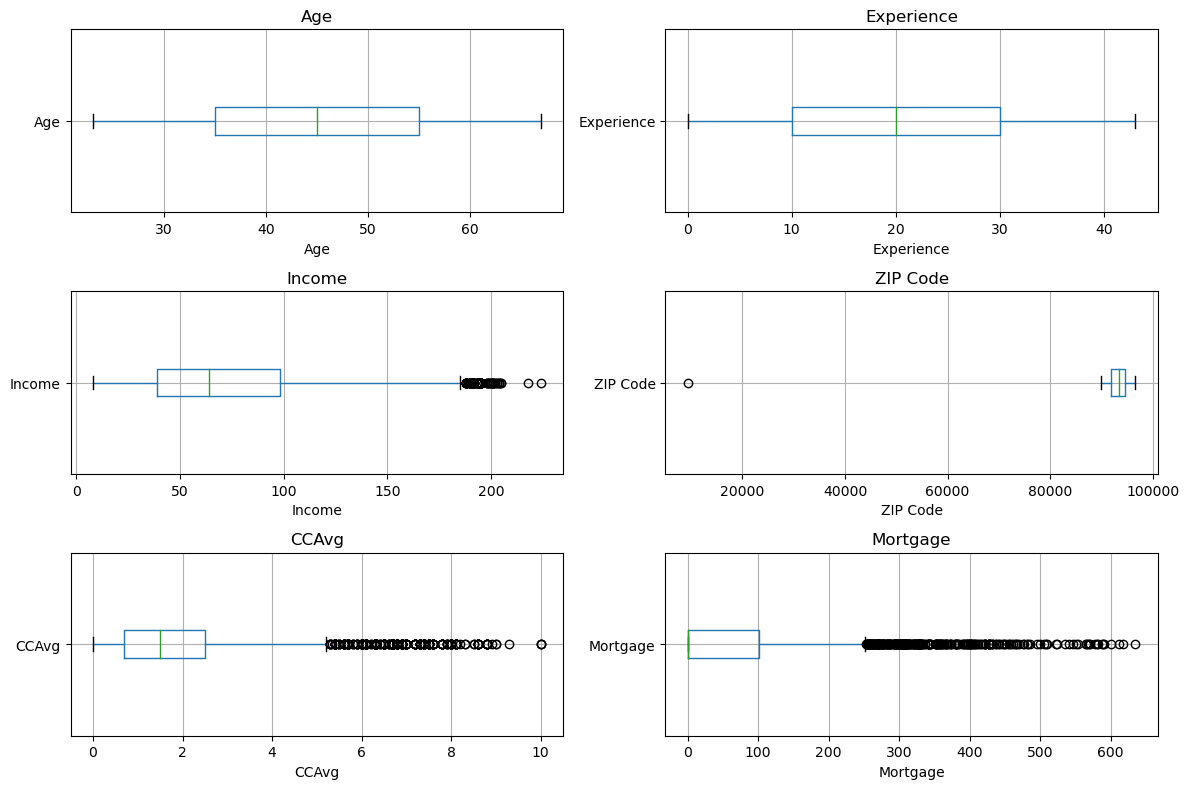

In [18]:
visualize_continuous_features(df.copy(), continuous_features)

### Key Findings from the above plots: <br>
#### In some of the features, there are potential outliers above the threshold including income, CCAvg and mortgage. This does not seem to interfere with modeling because they are all related to income and bank customers surely have various income level. But in ZIP Code column, there is one data point which is far from others and is probably due to wrong data entering. We will investigate this further in the below cells.

### Zip Code Column: <br>
#### Before proceeding to EDA and modeling, we need to evaluate the final column, which is the Zip code. This column contains data that shows the locations where bank customers reside. This information is essential in the analysis because it can help us understand the socioeconomic status of the customers and their tendency to apply for bank loans. Currently, the data in this column consists of numerous unique values, which makes it difficult to visualize. To extract more information from this column, we need to identify the name of the location represented by the zip code, along with its latitude and longitude. This additional data will enable us to visualize the locations accurately and gain further insights that could prove useful in our analysis.

In [19]:
filtered_indices = df[df['ZIP Code'] < 20000].index.tolist()

# Print the indices
print(filtered_indices)

[384]


In [20]:
df2 = df.copy()
df2 = df2.drop(384)
df2

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [21]:
df2['ZIP Code'].describe()

count     4999.000000
mean     93169.275455
std       1759.630610
min      90005.000000
25%      91911.000000
50%      93437.000000
75%      94608.000000
max      96651.000000
Name: ZIP Code, dtype: float64

#### The outlier data is successfully removed and we can now analyze this column further.

In [22]:
import zipcodes as zcode

df_temp = df2.copy()  # Make a copy to avoid modifying the original dataframe
df_temp["Latitude"] = np.nan  # Fill with NaN for missing values
df_temp["Longitude"] = np.nan
df_temp["Location Name"] = ""  # Fill with empty strings for missing locations

for index, row in df_temp.iterrows():
    zipcode = row["ZIP Code"]

    # Attempt zip code lookup if available
    if not pd.isna(zipcode):
        my_city_county = zcode.matching(str(zipcode))

        if len(my_city_county) == 1:
            # Extract information if a single match is found
            county = my_city_county[0].get("county", "")  # Get county with default ""
            latitude = my_city_county[0].get("lat", np.nan)  # Get latitude with default NaN
            longitude = my_city_county[0].get("long", np.nan)  # Get longitude with default NaN
            location_name = my_city_county[0].get("city", "")  # Get city name with default ""
        else:
            # Set defaults for missing information
            county = "NotFound"
            latitude = np.nan
            longitude = np.nan
            location_name = ""

    # Update columns in the copy dataframe
    df_temp.at[index, "Latitude"] = latitude
    df_temp.at[index, "Longitude"] = longitude
    df_temp.at[index, "Location Name"] = location_name


In [23]:
df_temp.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Latitude,Longitude,Location Name
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,34.1620,-118.0894,Pasadena
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,34.0218,-118.2883,Los Angeles
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,37.8746,-122.2547,Berkeley
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,37.7217,-122.4446,San Francisco
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,34.2429,-118.5273,Northridge


#### Now that we extracted the desired data, we check for missing values in these columns and manage them.

In [24]:
# Filter rows with missing values (combine conditions for efficiency)
missing_values = df_temp[(df_temp['Latitude'].isna()) | (df_temp['Longitude'].isna()) | (df_temp['Location Name'] == "")]

df_filtered = df_temp.drop(missing_values.index)



#### There are only 3 unique values of zip codes that this library could not find and are thus missing. we can search them manually and insert them into the existing dataframe. See the code block below for further details of these values:

In [25]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4966 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4966 non-null   int64  
 1   Experience          4966 non-null   int64  
 2   Income              4966 non-null   int64  
 3   ZIP Code            4966 non-null   int64  
 4   Family              4966 non-null   int64  
 5   CCAvg               4966 non-null   float64
 6   Education           4966 non-null   int64  
 7   Mortgage            4966 non-null   int64  
 8   Personal Loan       4966 non-null   int64  
 9   Securities Account  4966 non-null   int64  
 10  CD Account          4966 non-null   int64  
 11  Online              4966 non-null   int64  
 12  CreditCard          4966 non-null   int64  
 13  Latitude            4966 non-null   object 
 14  Longitude           4966 non-null   object 
 15  Location Name       4966 non-null   object 
dtypes: float64(

#### We're all set for EDA and modeling as there are no longer any missing values in any columns. However, we must convert the data type of columns latitude and longitude to float64 so we can include them in our analysis.

In [26]:
df_filtered["Latitude"] = df_filtered["Latitude"].astype(float)  # Convert columns to float64
df_filtered["Longitude"] = df_filtered["Longitude"].astype(float) 

In [27]:
df_final = df_filtered.copy()
categorical_features, continuous_features = categorize_features(df_final.copy())
# Print the lists of features to make sure changes are applied
print(f"Categorical features include: {categorical_features}")
print(f"Continuous features include: {continuous_features}")

Categorical features include: ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
Continuous features include: ['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage', 'Latitude', 'Longitude', 'Location Name']


# 4. Exploratory Data Analysis

## 4.1. Univariate Analysis

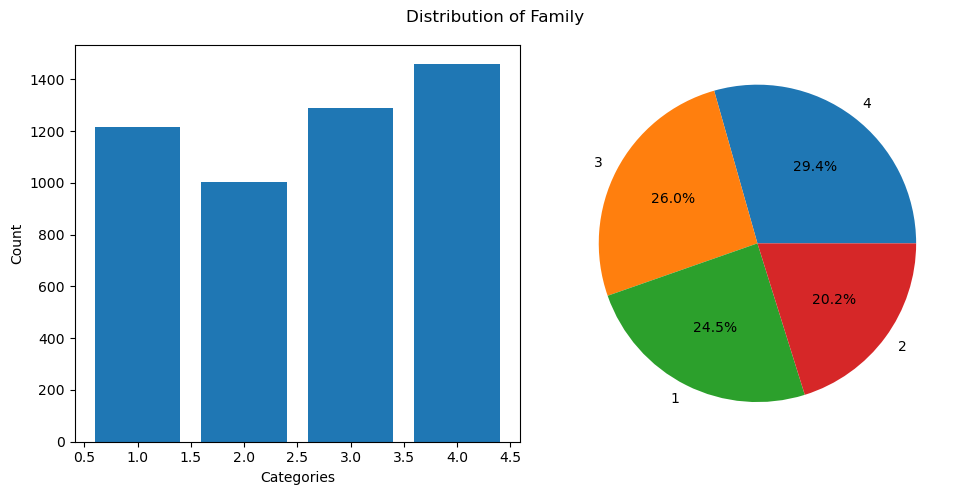

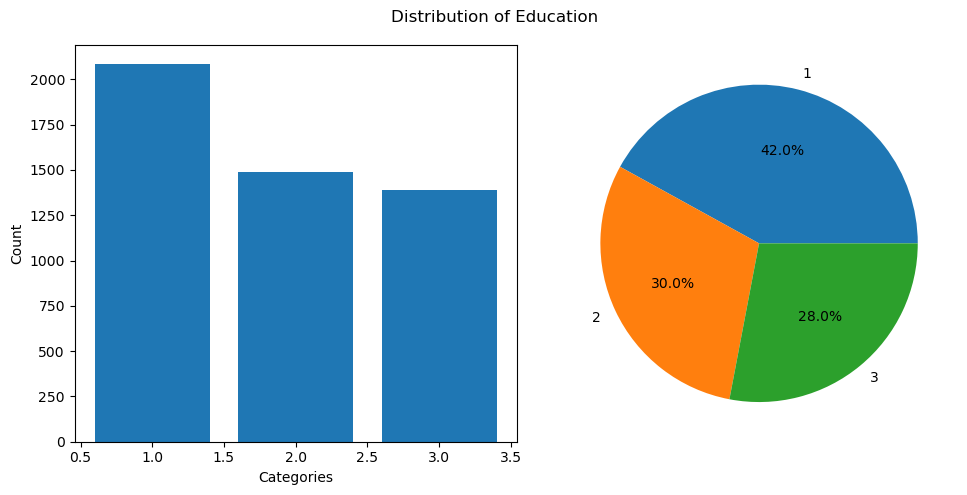

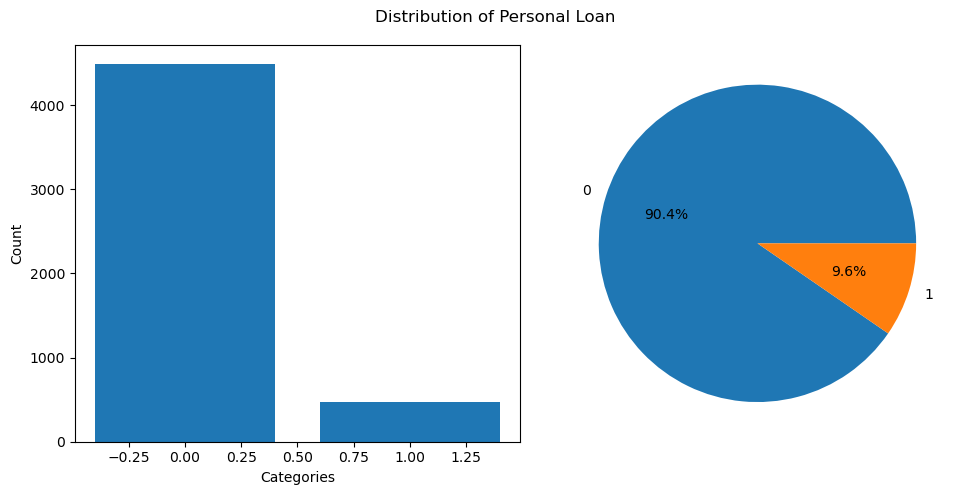

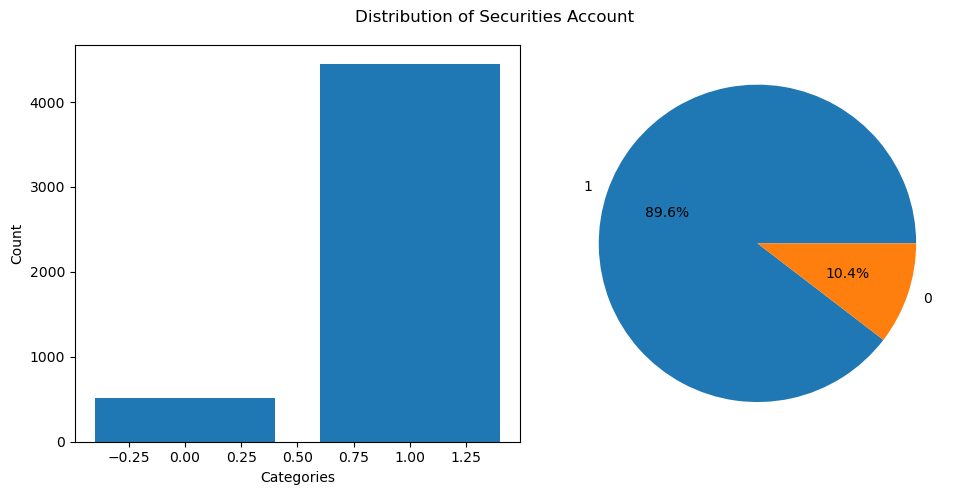

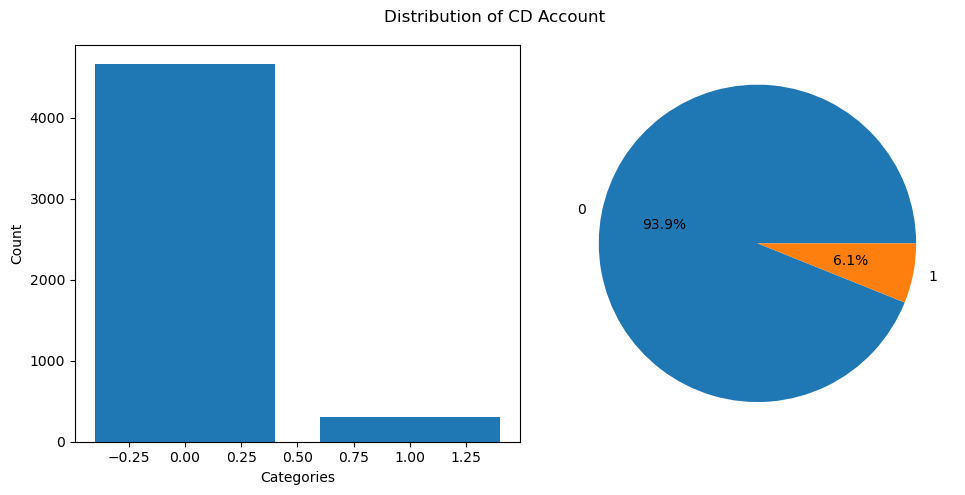

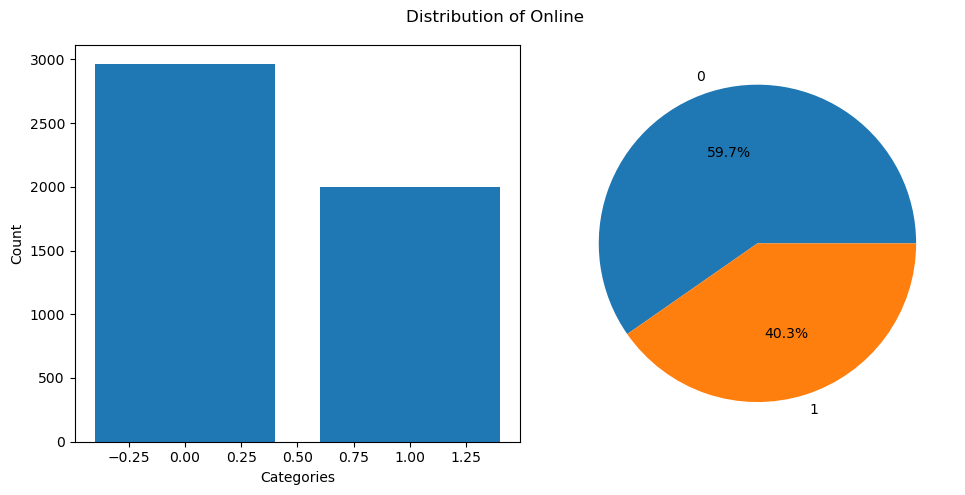

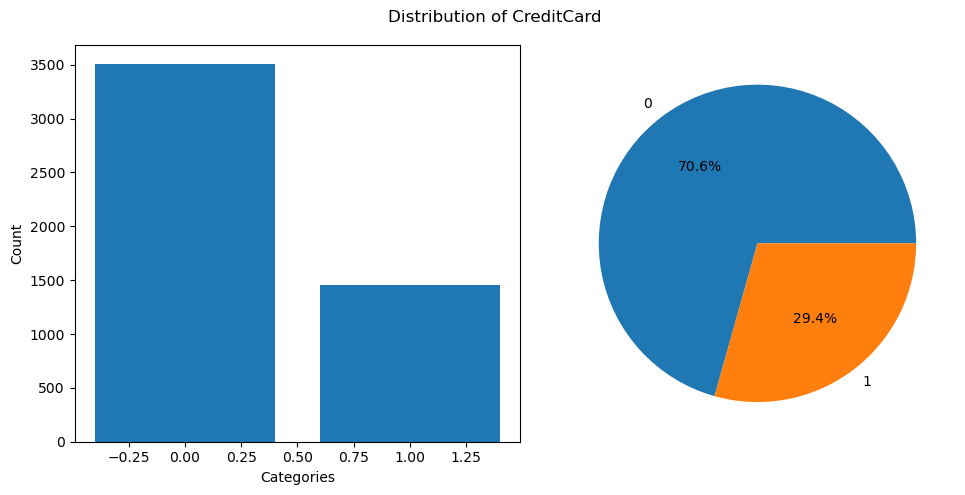

In [28]:
def create_combined_chart(feature):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # Create a 1x2 subplot figure with adjusted size
  fig.suptitle(f"Distribution of {feature}")  # Set a title for the entire figure (optional)

  # Bar chart for category counts
  ax1.bar(df_final[feature].astype(int).unique(), df_final[feature].value_counts())
  ax1.set_xlabel("Categories")
  ax1.set_ylabel("Count")

  # Pie chart for category distribution
  ax2.pie(df_final[feature].value_counts(), labels=df_final[feature].unique(), autopct="%1.1f%%")
  ax2.set_aspect("equal")  # Ensure pie chart is circular

  plt.tight_layout()  # Adjust spacing between subplots

# Loop through each categorical feature
for feature in categorical_features:
  create_combined_chart(feature)
  plt.show()

In [29]:
def visualize_continuous_features(df, continuous_features):
  """
  This function visualizes the distribution of continuous features in a dataframe
  using subplots for histplots and scatterplots.

  Args:
      df (pandas.DataFrame): The dataframe containing the data.
      continuous_features (list): A list of feature names that are continuous.
  """
  num_features = len(continuous_features)
  num_rows, num_cols = (math.ceil(num_features / 2), 2)  # Subplot layout

  # Create a figure for subplots
  fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))  # Adjust figsize as needed

  # Iterate through features and create subplots
  feature_index = 0
  for i in range(num_rows):
    for j in range(num_cols):
      if feature_index >= num_features:
        axes[i, j].axis('off')  # Hide extra subplots
        continue

      feature_name = continuous_features[feature_index]
      feature_data = df[feature_name]

      # Histplot for continuous features
      sns.histplot(feature_data, ax=axes[i, j])
      axes[i, j].set_title(f"Distribution of {feature_name} (Histplot)")


      feature_index += 1

  # Adjust layout and display the plot
  fig.suptitle("Distribution of Continuous Features", fontsize=14)
  plt.tight_layout()
  plt.show()

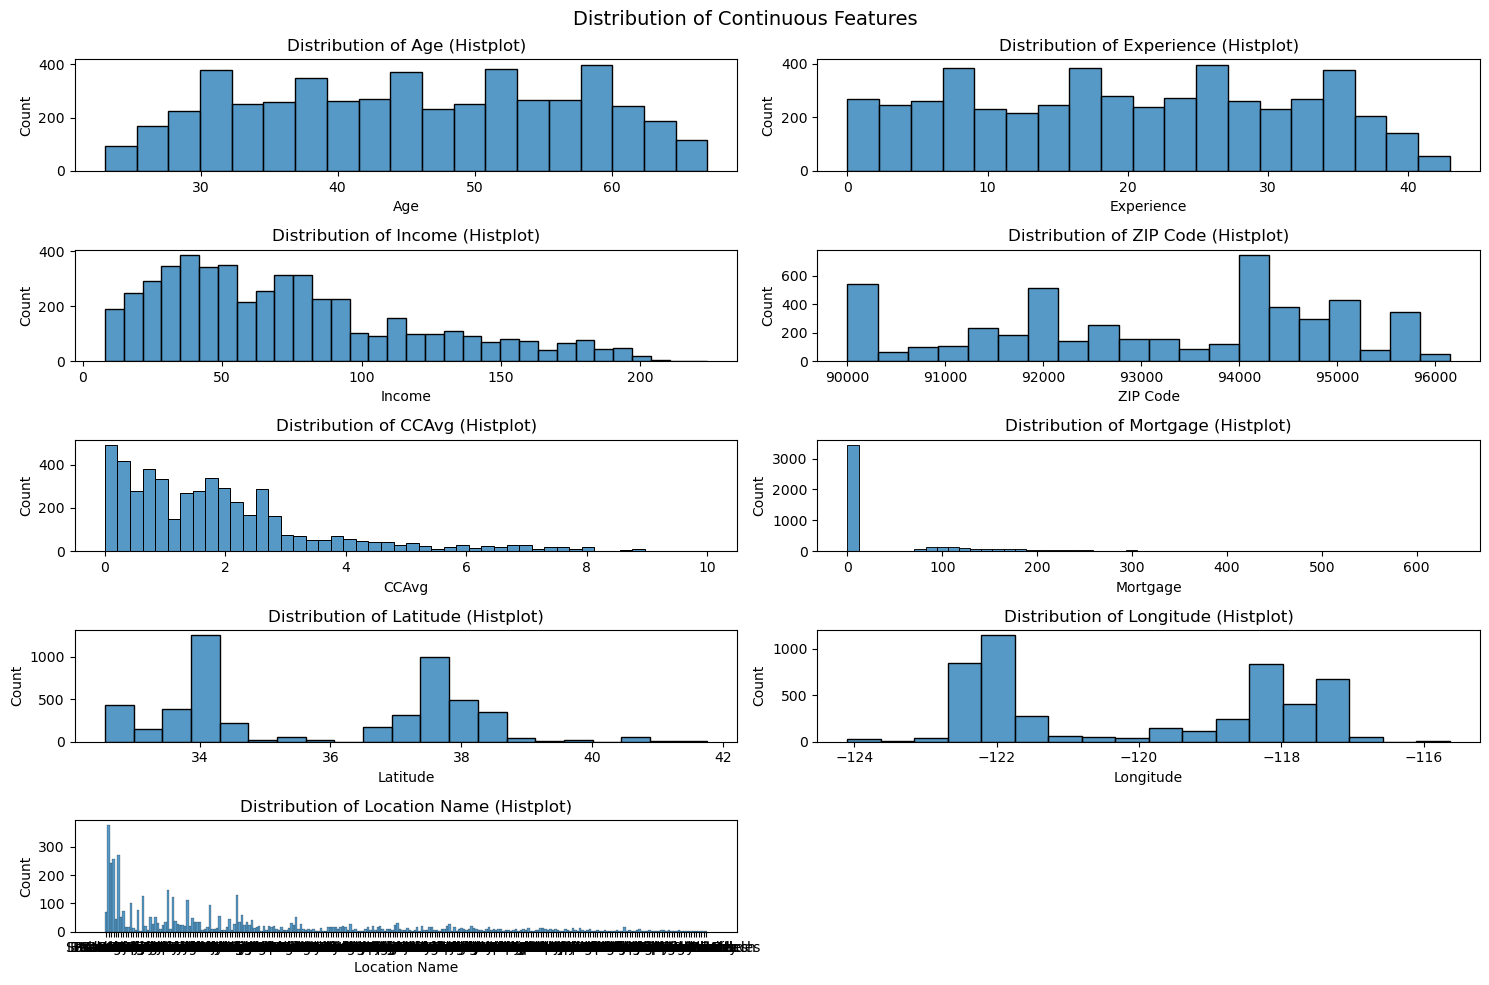

In [30]:
visualize_continuous_features(df_final, continuous_features)

### The findings from above graphs include: <br>
#### 1. Age and experience have almost normal distribution and the most frequent age group in our sample are 30 to 60 years old. <br> 2. The average income has most value counts in the dataset. There is a significant drop for income higher than 100K. <br> 3. The CCAvg column higher than 3 has significantly lower counts in the dataset. <br> 4. the location name column includes many unique values and needs more detailed evaluation. 

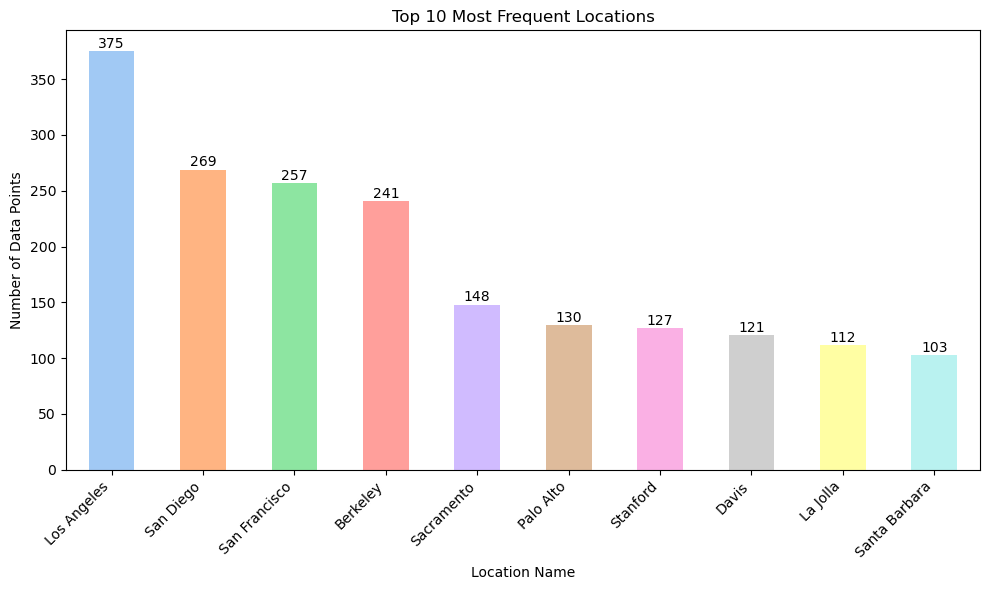

In [31]:
# Color palette selection (adjust as needed)
palette_name = "pastel"  # Choose from Seaborn palettes (e.g., "dark", "muted")

# Get the top 10 most frequent location names
top_10_locations = df_final['Location Name'].value_counts().head(10)

# Create a color list from the chosen palette
palette = sns.color_palette(palette_name, n_colors=len(top_10_locations))

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = top_10_locations.plot(kind='bar', color=palette)  # Use the color palette

# Customize the plot (optional)
plt.xlabel("Location Name")
plt.ylabel("Number of Data Points")
plt.title(f"Top 10 Most Frequent Locations")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

# Add data point counts above each bar (optional)
for idx, value in enumerate(top_10_locations):
  plt.text(idx, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


## 4.2. bivariate analysis

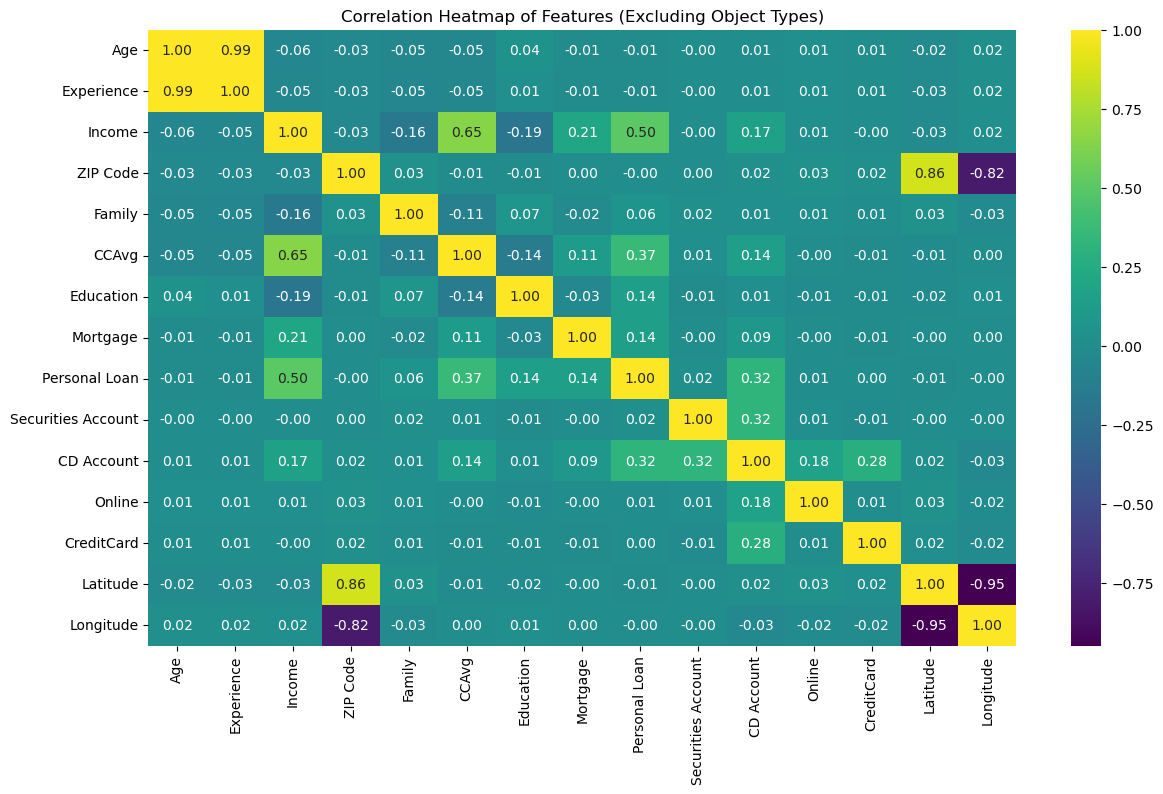

In [32]:
  # Select only numerical or categorical features (excluding object type)
correlation_matrix = df_final.select_dtypes(include=[np.number]).corr()

  # Create a heatmap using seaborn
plt.figure(figsize=(14, 8))  # Set the figure size
fmt = ".2f"  # Format string to display two decimal places
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=fmt)

  # Customize the plot (optional)
plt.title("Correlation Heatmap of Features (Excluding Object Types)")
plt.show()

## 4.3. multivariate analysis

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


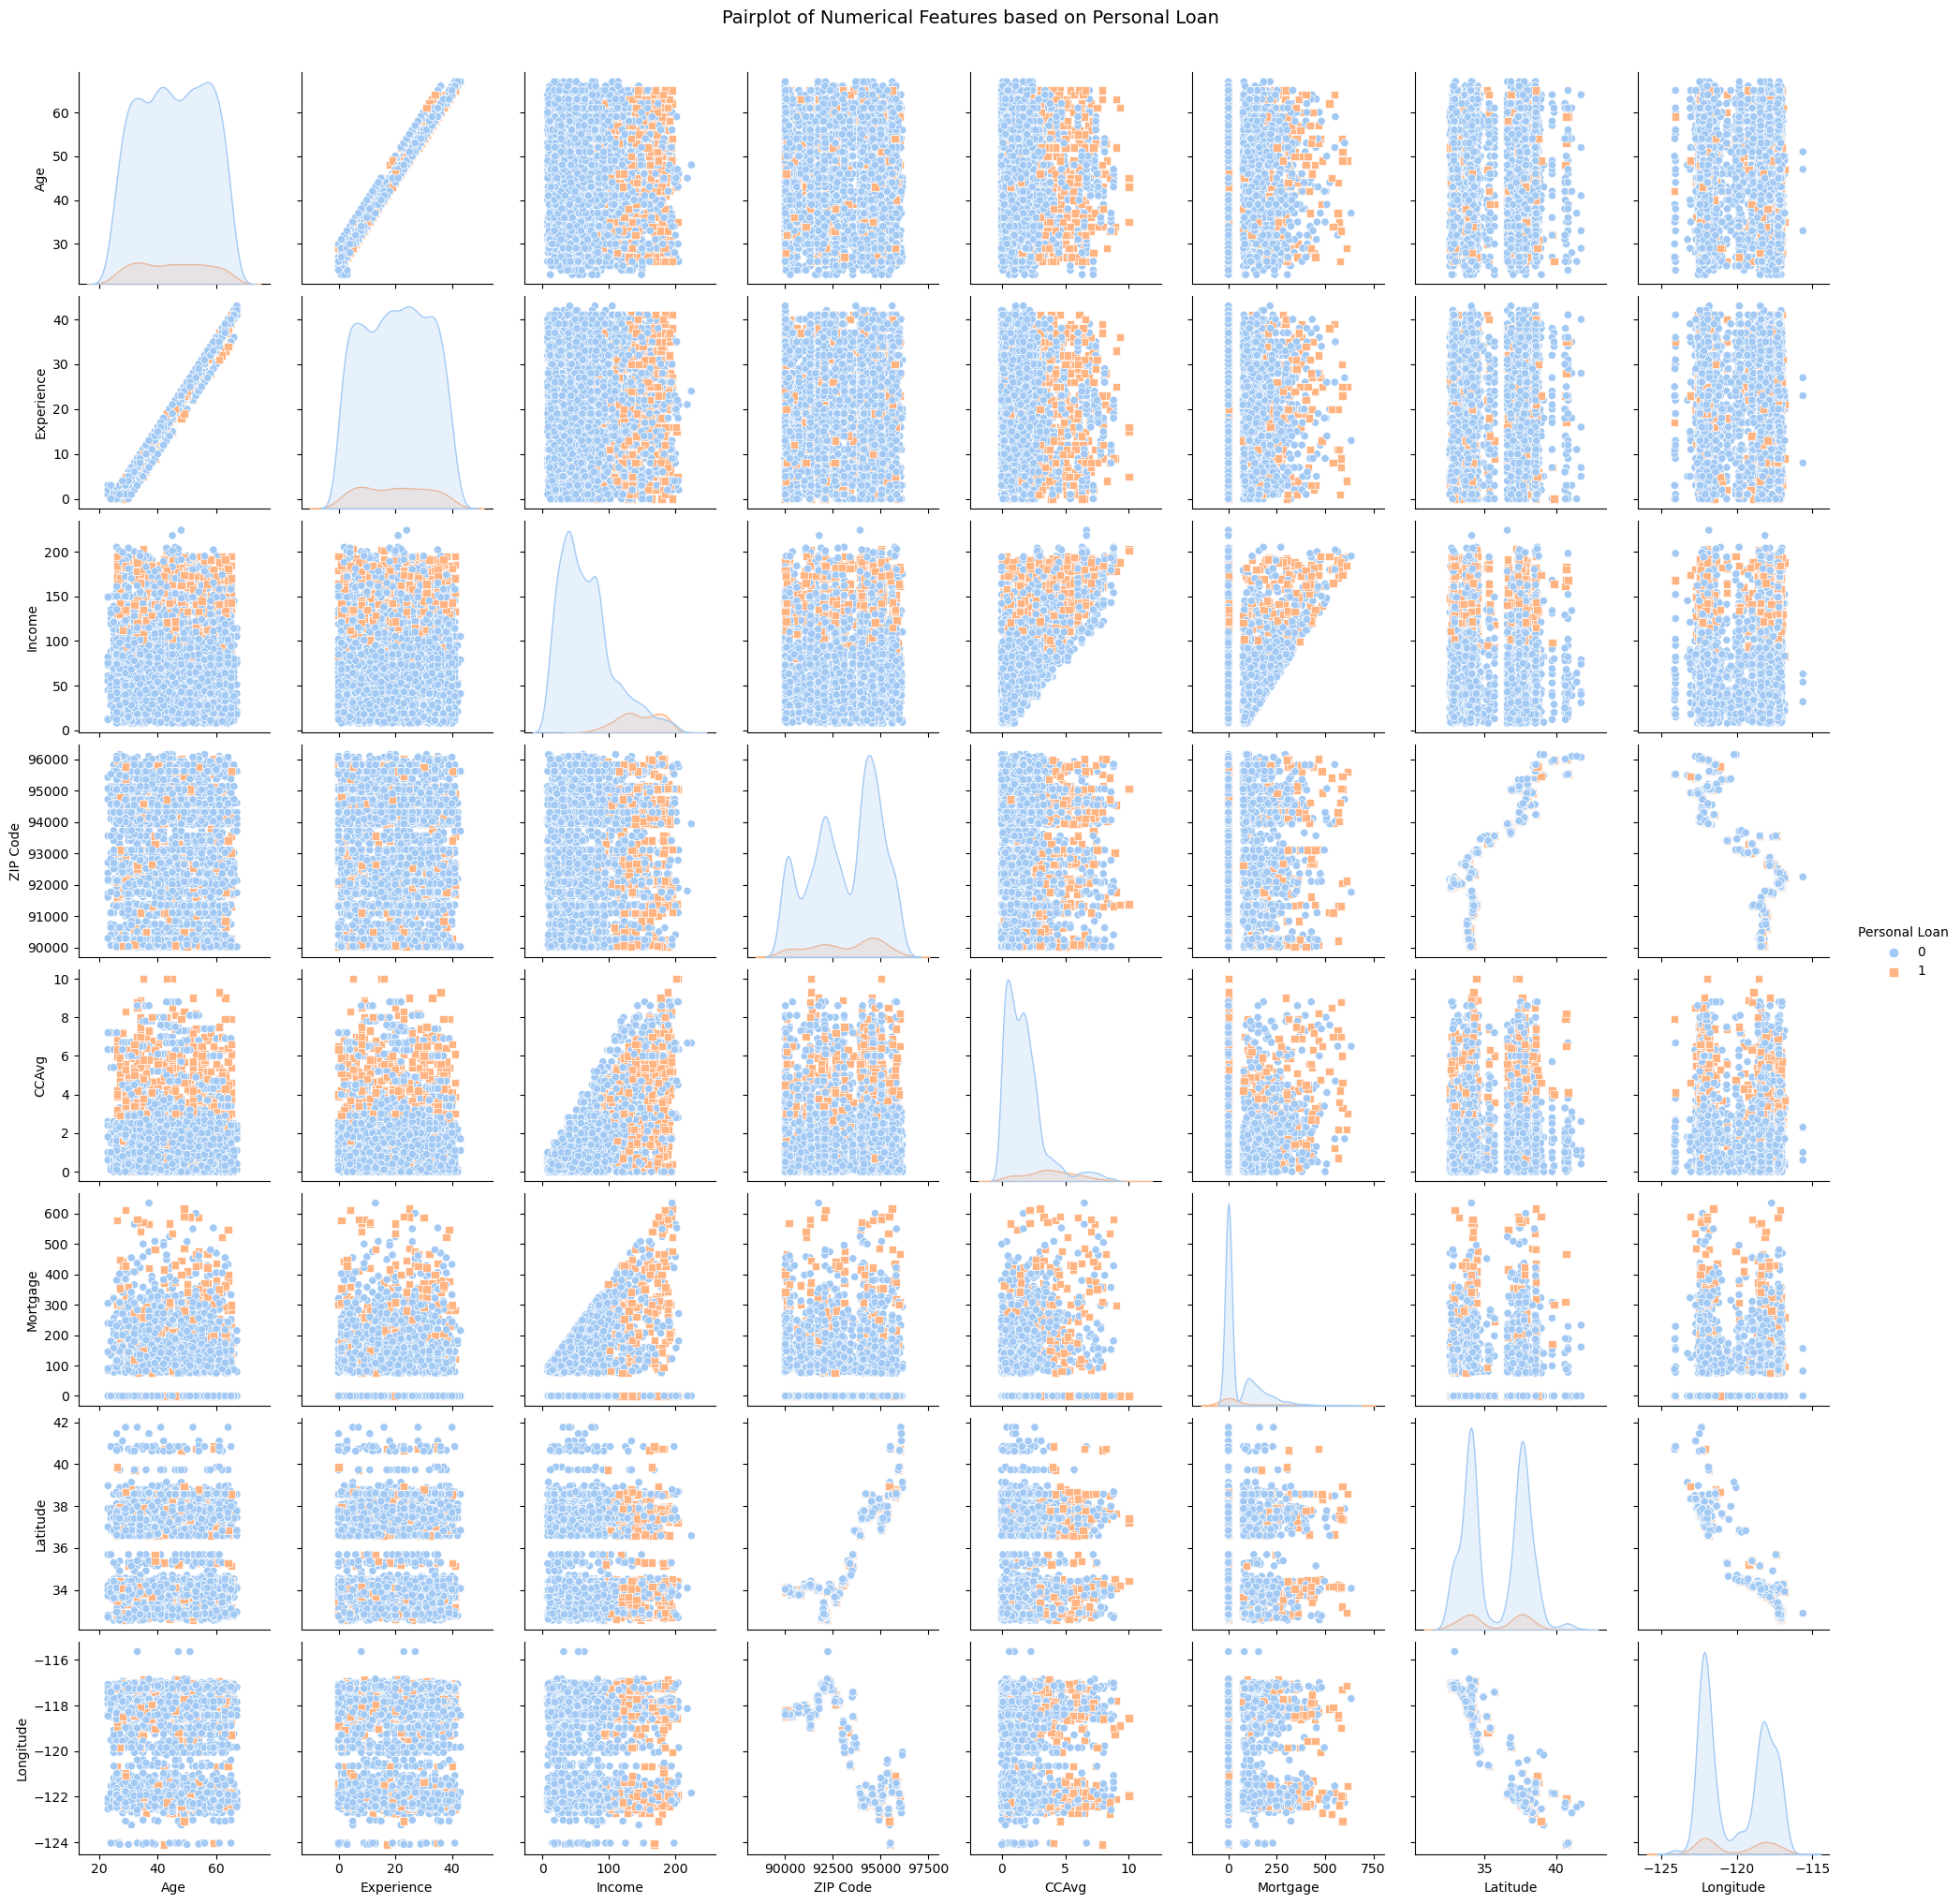

In [33]:
# Create a temporary list with numerical features only
numeric_features = [col for col in continuous_features if col != "Location Name"]

# Create the pairplot (scatter plots)
g = sns.pairplot(data=df_final, x_vars=numeric_features, y_vars=numeric_features, 
             hue='Personal Loan', markers=["o", "s"], 
             palette='pastel')

# Customize the plot (optional)
g.fig.suptitle("Pairplot of Numerical Features based on Personal Loan", 
               y=1.02, fontsize=14)  
plt.show()


# 5. Prepare Dataset for Modeling

In [42]:
#normalizing the dataset
from sklearn.preprocessing import MinMaxScaler

df_Normal = df_final.copy()

# Assuming 'Personal Loan' is the target column
target_col = 'Personal Loan'

# Exclude Location and target column
columns_to_exclude = [target_col, 'Location Name']

# Get feature columns to normalize (excluding Location and target)
feature_cols = [col for col in df_Normal.columns if col not in columns_to_exclude]

# Create a MinMaxScaler object with range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the features (excluding Location and target)
scaler.fit(df_Normal[feature_cols])

# Transform only the relevant features
df_Normal[feature_cols] = scaler.transform(df_Normal[feature_cols])

print(df_Normal.head())  # View the first few rows of the scaled DataFrame



        Age  Experience    Income  ZIP Code    Family  CCAvg  Education  \
0  0.045455    0.023256  0.189815  0.179333  1.000000   0.16        0.0   
1  0.500000    0.441860  0.120370  0.013670  0.666667   0.15        0.0   
2  0.363636    0.348837  0.013889  0.767290  0.000000   0.10        0.0   
3  0.272727    0.209302  0.425926  0.668348  0.000000   0.27        0.5   
4  0.272727    0.186047  0.171296  0.215622  1.000000   0.10        0.5   

   Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0       0.0              0                 1.0         0.0     0.0   
1       0.0              0                 1.0         0.0     0.0   
2       0.0              0                 0.0         0.0     0.0   
3       0.0              0                 0.0         0.0     0.0   
4       0.0              0                 0.0         0.0     0.0   

   CreditCard  Latitude  Longitude  Location Name  
0         0.0  0.174627   0.709655       Pasadena  
1         0.0  0.159395 

In [43]:
df_Normal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4966 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4966 non-null   float64
 1   Experience          4966 non-null   float64
 2   Income              4966 non-null   float64
 3   ZIP Code            4966 non-null   float64
 4   Family              4966 non-null   float64
 5   CCAvg               4966 non-null   float64
 6   Education           4966 non-null   float64
 7   Mortgage            4966 non-null   float64
 8   Personal Loan       4966 non-null   int64  
 9   Securities Account  4966 non-null   float64
 10  CD Account          4966 non-null   float64
 11  Online              4966 non-null   float64
 12  CreditCard          4966 non-null   float64
 13  Latitude            4966 non-null   float64
 14  Longitude           4966 non-null   float64
 15  Location Name       4966 non-null   object 
dtypes: float64(

# 6. Modeling

## 6.1. Defining functions

In [44]:
import matplotlib.pyplot as plt  # For visualizing the confusion matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have the Evaluation function defined elsewhere

def LogReg(x, y, test_size, solver):
    ## Split data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)

    ## Create and fit the model with the specified solver
    model = LogisticRegression(solver=solver)
    model.fit(x_train, y_train.ravel())

    ## Cross-validation for evaluating model on train data
    cv_score = cross_val_score(model, x_train, y_train.ravel(), cv=10, scoring='accuracy').mean()

    ## Print model evaluation metrics
    print('Accuracy of Logistic Regression Model:', accuracy_score(y_test, model.predict(x_test)))
    ModelEvaluation(model, x, y, x_train, y_train, x_test, y_test, cv_score)


In [45]:
import matplotlib.pyplot as plt  # For visualizing the confusion matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB  # Import specific models
from sklearn.metrics import accuracy_score

# Assuming you have the ModelEvaluation function defined elsewhere

def NaiveBayes(x, y, test_size, model_type):
    """
    Performs Naive Bayes classification with different model types.

    Args:
        x (pd.DataFrame or np.ndarray): Features (independent variables).
        y (pd.Series or np.ndarray): Target variable (dependent variable).
        test_size (float): Proportion of data to use for testing.
        model_type (str): Type of Naive Bayes model to use (e.g., 'gaussian', 'multinomial').

    Returns:
        None (prints ModelEvaluation metrics and visualizations).
    """

    # Split data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)

    # Create and fit the model based on the specified type
    if model_type == 'gaussian':
        model = GaussianNB()
    elif model_type == 'multinomial':
        model = MultinomialNB()
    else:
        raise ValueError("Invalid model_type. Choose 'gaussian' or 'multinomial'.")

    model.fit(x_train, y_train.ravel())

    # Cross-validation for evaluating model on train data
    cv_score = cross_val_score(model, x_train, y_train.ravel(), cv=10, scoring='accuracy').mean()

    # Print model ModelEvaluation metrics
    print('Accuracy of', model_type, 'Naive Bayes Model:', accuracy_score(y_test, model.predict(x_test)))
    ModelEvaluation(model, x, y, x_train, y_train, x_test, y_test, cv_score)



In [46]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have the ModelEvaluation function defined elsewhere

def KNN(x, y, test_size, k_max):
    """
    Performs K-Nearest Neighbors classification with hyperparameter tuning for k.

    Args:
        x (pd.DataFrame or np.ndarray): Features (independent variables).
        y (pd.Series or np.ndarray): Target variable (dependent variable).
        test_size (float): Proportion of data to use for testing.
        k_max (int): Upper limit for the range of k values to try.

    Returns:
        None (prints evaluation metrics and visualizations).
    """

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)

    # Initialize empty lists for scores
    train_score = []
    test_score = []

    # Try different k values and store scores
    for k in range(1, k_max + 1):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(x_train, y_train.ravel())
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))


    # Train the model with the best k
    model = KNeighborsClassifier(n_neighbors=k_max)
    model.fit(x_train, y_train.ravel())

    # Cross-validation for evaluating the model
    cv_score = cross_val_score(model, x_train, y_train.ravel(), cv=10, scoring='accuracy').mean()

    # Print ModelEvaluation metrics
    print('Accuracy of KNN Model for k=%d:' % k_max, model.score(x_test, y_test))
    ModelEvaluation(model, x, y, x_train, y_train, x_test, y_test, cv_score)

    # Plot accuracy vs k
    plt.plot(range(1, k_max + 1), train_score, color='darkblue', label='Train Accuracy')
    plt.plot(range(1, k_max + 1), test_score, color='darkorange', label='Test Accuracy')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('K-Nearest Neighbors Accuracy vs k')
    plt.legend()
    plt.show()


In [47]:
def ModelEvaluation(model, X, y, X_train, y_train, X_test, y_test, cv_score):
    """
    Evaluates a classification model and prints performance metrics.

    Args:
        model (object): The classification model to evaluate.
        X (pd.DataFrame or np.ndarray): Features (independent variables).
        y (pd.Series or np.ndarray): Target variable (dependent variable).
        X_train (pd.DataFrame or np.ndarray): Training features.
        y_train (pd.Series or np.ndarray): Training target variable.
        X_test (pd.DataFrame or np.ndarray): Testing features.
        y_test (pd.Series or np.ndarray): Testing target variable.
        cv_score (float): Average cross-validation score.

    Returns:
        None (prints evaluation metrics).
    """

    print('Training Accuracy:', np.round(model.score(X_train, y_train), 3))
    print('Cross-Validation Score (mean):', np.round(cv_score, 3))
    print('Jaccard Similarity:', np.round(jaccard_score(y_test, model.predict(X_test)), 3))
    print('Precision:', np.round(precision_score(y_test, model.predict(X_test)), 3))
    print('Recall:', np.round(recall_score(y_test, model.predict(X_test)), 3))
    print('F1-Score:', np.round(f1_score(y_test, model.predict(X_test)), 3))
    print('Confusion Matrix:\n', confusion_matrix(y, model.predict(X)))


## 6.2. Training the models:

In [48]:
# Let's first define x and y. The below models will be using these values for their model training. 
x = df_Normal.drop(['Personal Loan', 'Location Name'], axis=1)
y = df_Normal['Personal Loan'].values.reshape(-1,1)

### 6.2.1. test size = 0.15:

Accuracy of Logistic Regression Model: 0.9530201342281879
Training Accuracy: 0.949
Cross-Validation Score (mean): 0.949
Jaccard Similarity: 0.539
Precision: 0.872
Recall: 0.586
F1-Score: 0.701
Confusion Matrix:
 [[4446   43]
 [ 206  271]]
Accuracy of gaussian Naive Bayes Model: 0.8805369127516779
Training Accuracy: 0.884
Cross-Validation Score (mean): 0.885
Jaccard Similarity: 0.299
Precision: 0.4
Recall: 0.543
F1-Score: 0.461
Confusion Matrix:
 [[4113  376]
 [ 201  276]]
Accuracy of multinomial Naive Bayes Model: 0.9073825503355705
Training Accuracy: 0.905
Cross-Validation Score (mean): 0.906
Jaccard Similarity: 0.014
Precision: 1.0
Recall: 0.014
F1-Score: 0.028
Confusion Matrix:
 [[4489    0]
 [ 469    8]]
Accuracy of KNN Model for k=3: 0.9516778523489933
Training Accuracy: 0.971
Cross-Validation Score (mean): 0.951
Jaccard Similarity: 0.493
Precision: 0.972
Recall: 0.5
F1-Score: 0.66
Confusion Matrix:
 [[4475   14]
 [ 143  334]]


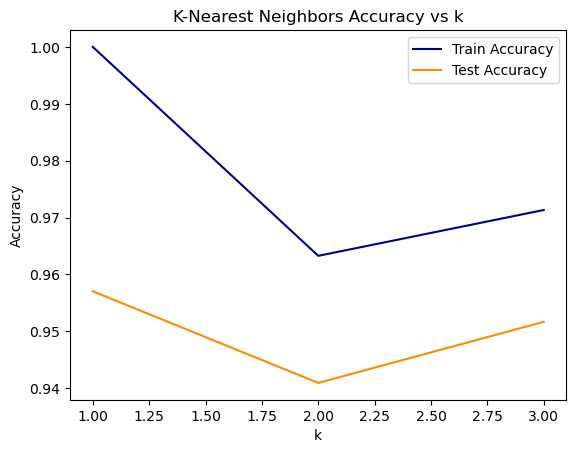

In [49]:
test_size = 0.15
LogReg(x, y, test_size= test_size, solver='liblinear')
print ('='*25)

NaiveBayes(x, y, test_size=test_size, model_type='gaussian')
print ('='*25)

NaiveBayes(x, y, test_size=test_size, model_type='multinomial')
print ('='*25)

KNN(x, y, test_size=test_size, k_max=3)
print ('='*25)


### 6.2.2. test size = 0.2:

Accuracy of Logistic Regression Model: 0.9496981891348089
Training Accuracy: 0.95
Cross-Validation Score (mean): 0.949
Jaccard Similarity: 0.51
Precision: 0.825
Recall: 0.571
F1-Score: 0.675
Confusion Matrix:
 [[4446   43]
 [ 204  273]]
Accuracy of gaussian Naive Bayes Model: 0.8843058350100603
Training Accuracy: 0.885
Cross-Validation Score (mean): 0.886
Jaccard Similarity: 0.307
Precision: 0.405
Recall: 0.56
F1-Score: 0.47
Confusion Matrix:
 [[4116  373]
 [ 200  277]]
Accuracy of multinomial Naive Bayes Model: 0.9104627766599598
Training Accuracy: 0.904
Cross-Validation Score (mean): 0.904
Jaccard Similarity: 0.022
Precision: 1.0
Recall: 0.022
F1-Score: 0.043
Confusion Matrix:
 [[4489    0]
 [ 470    7]]
Accuracy of KNN Model for k=3: 0.9527162977867203
Training Accuracy: 0.972
Cross-Validation Score (mean): 0.951
Jaccard Similarity: 0.51
Precision: 0.907
Recall: 0.538
F1-Score: 0.676
Confusion Matrix:
 [[4475   14]
 [ 143  334]]


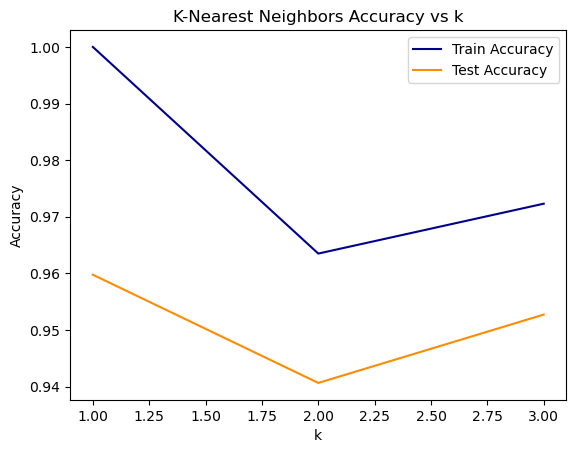

In [50]:
test_size = 0.20
LogReg(x, y, test_size= test_size, solver='liblinear')
print ('='*25)

NaiveBayes(x, y, test_size=test_size, model_type='gaussian')
print ('='*25)

NaiveBayes(x, y, test_size=test_size, model_type='multinomial')
print ('='*25)

KNN(x, y, test_size=test_size, k_max=3)
print ('='*25)

### 6.2.3. test size = 0.25

Accuracy of Logistic Regression Model: 0.9516908212560387
Training Accuracy: 0.949
Cross-Validation Score (mean): 0.948
Jaccard Similarity: 0.528
Precision: 0.848
Recall: 0.583
F1-Score: 0.691
Confusion Matrix:
 [[4448   41]
 [ 208  269]]
Accuracy of gaussian Naive Bayes Model: 0.8856682769726248
Training Accuracy: 0.885
Cross-Validation Score (mean): 0.885
Jaccard Similarity: 0.324
Precision: 0.417
Recall: 0.591
F1-Score: 0.489
Confusion Matrix:
 [[4118  371]
 [ 198  279]]
Accuracy of multinomial Naive Bayes Model: 0.9098228663446055
Training Accuracy: 0.904
Cross-Validation Score (mean): 0.903
Jaccard Similarity: 0.026
Precision: 1.0
Recall: 0.026
F1-Score: 0.051
Confusion Matrix:
 [[4489    0]
 [ 471    6]]
Accuracy of KNN Model for k=3: 0.9549114331723028
Training Accuracy: 0.972
Cross-Validation Score (mean): 0.949
Jaccard Similarity: 0.533
Precision: 0.928
Recall: 0.557
F1-Score: 0.696
Confusion Matrix:
 [[4477   12]
 [ 147  330]]


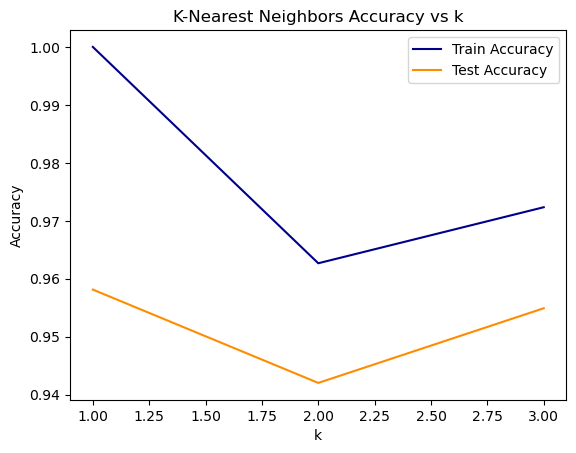

In [51]:
test_size = 0.25
LogReg(x, y, test_size= test_size, solver='liblinear')
print ('='*25)

NaiveBayes(x, y, test_size=test_size, model_type='gaussian')
print ('='*25)

NaiveBayes(x, y, test_size=test_size, model_type='multinomial')
print ('='*25)

KNN(x, y, test_size=test_size, k_max=3)
print ('='*25)

### 6.2.4. test_size = 0.3

Accuracy of Logistic Regression Model: 0.9523489932885906
Training Accuracy: 0.95
Cross-Validation Score (mean): 0.948
Jaccard Similarity: 0.536
Precision: 0.863
Recall: 0.586
F1-Score: 0.698
Confusion Matrix:
 [[4448   41]
 [ 205  272]]
Accuracy of gaussian Naive Bayes Model: 0.8818791946308725
Training Accuracy: 0.886
Cross-Validation Score (mean): 0.887
Jaccard Similarity: 0.328
Precision: 0.413
Recall: 0.614
F1-Score: 0.494
Confusion Matrix:
 [[4116  373]
 [ 198  279]]
Accuracy of multinomial Naive Bayes Model: 0.9087248322147651
Training Accuracy: 0.904
Cross-Validation Score (mean): 0.904
Jaccard Similarity: 0.029
Precision: 1.0
Recall: 0.029
F1-Score: 0.056
Confusion Matrix:
 [[4489    0]
 [ 471    6]]
Accuracy of KNN Model for k=3: 0.9550335570469799
Training Accuracy: 0.973
Cross-Validation Score (mean): 0.948
Jaccard Similarity: 0.541
Precision: 0.929
Recall: 0.564
F1-Score: 0.702
Confusion Matrix:
 [[4476   13]
 [ 148  329]]


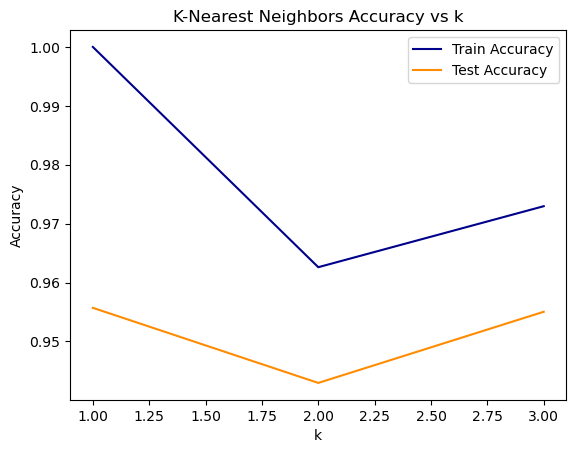

In [52]:
test_size = 0.30
LogReg(x, y, test_size= test_size, solver='liblinear')
print ('='*25)

NaiveBayes(x, y, test_size=test_size, model_type='gaussian')
print ('='*25)

NaiveBayes(x, y, test_size=test_size, model_type='multinomial')
print ('='*25)

KNN(x, y, test_size=test_size, k_max=3)
print ('='*25)

### 6.2.5. test size = 0.35

Accuracy of Logistic Regression Model: 0.9539965497412306
Training Accuracy: 0.948
Cross-Validation Score (mean): 0.947
Jaccard Similarity: 0.538
Precision: 0.869
Recall: 0.585
F1-Score: 0.699
Confusion Matrix:
 [[4446   43]
 [ 204  273]]
Accuracy of gaussian Naive Bayes Model: 0.882691201840138
Training Accuracy: 0.888
Cross-Validation Score (mean): 0.887
Jaccard Similarity: 0.325
Precision: 0.407
Recall: 0.616
F1-Score: 0.49
Confusion Matrix:
 [[4118  371]
 [ 194  283]]
Accuracy of multinomial Naive Bayes Model: 0.9108683151236343
Training Accuracy: 0.902
Cross-Validation Score (mean): 0.903
Jaccard Similarity: 0.025
Precision: 1.0
Recall: 0.025
F1-Score: 0.049
Confusion Matrix:
 [[4489    0]
 [ 471    6]]
Accuracy of KNN Model for k=3: 0.9545715928694652
Training Accuracy: 0.973
Cross-Validation Score (mean): 0.947
Jaccard Similarity: 0.524
Precision: 0.926
Recall: 0.547
F1-Score: 0.688
Confusion Matrix:
 [[4474   15]
 [ 151  326]]


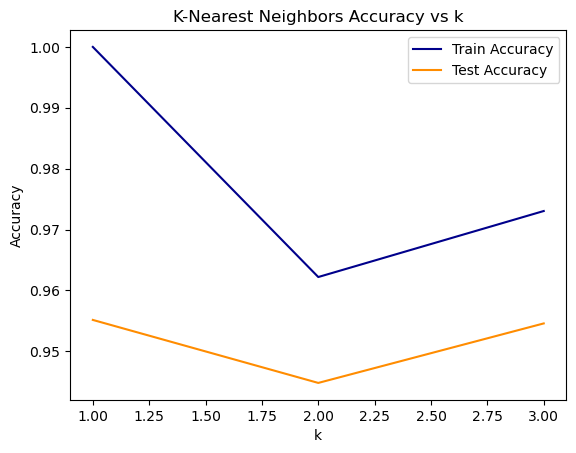

In [53]:
test_size = 0.35
LogReg(x, y, test_size= test_size, solver='liblinear')
print ('='*25)

NaiveBayes(x, y, test_size=test_size, model_type='gaussian')
print ('='*25)

NaiveBayes(x, y, test_size=test_size, model_type='multinomial')
print ('='*25)

KNN(x, y, test_size=test_size, k_max=3)
print ('='*25)

### 6.2.6. test size = 0.40

Accuracy of Logistic Regression Model: 0.9501761449421238
Training Accuracy: 0.949
Cross-Validation Score (mean): 0.945
Jaccard Similarity: 0.517
Precision: 0.848
Recall: 0.57
F1-Score: 0.682
Confusion Matrix:
 [[4448   41]
 [ 211  266]]
Accuracy of gaussian Naive Bayes Model: 0.8842476094614997
Training Accuracy: 0.887
Cross-Validation Score (mean): 0.888
Jaccard Similarity: 0.339
Precision: 0.421
Recall: 0.634
F1-Score: 0.506
Confusion Matrix:
 [[4113  376]
 [ 190  287]]
Accuracy of multinomial Naive Bayes Model: 0.9079013588324106
Training Accuracy: 0.903
Cross-Validation Score (mean): 0.903
Jaccard Similarity: 0.016
Precision: 1.0
Recall: 0.016
F1-Score: 0.032
Confusion Matrix:
 [[4489    0]
 [ 473    4]]
Accuracy of KNN Model for k=3: 0.9542023150478107
Training Accuracy: 0.973
Cross-Validation Score (mean): 0.947
Jaccard Similarity: 0.531
Precision: 0.928
Recall: 0.554
F1-Score: 0.694
Confusion Matrix:
 [[4476   13]
 [ 159  318]]


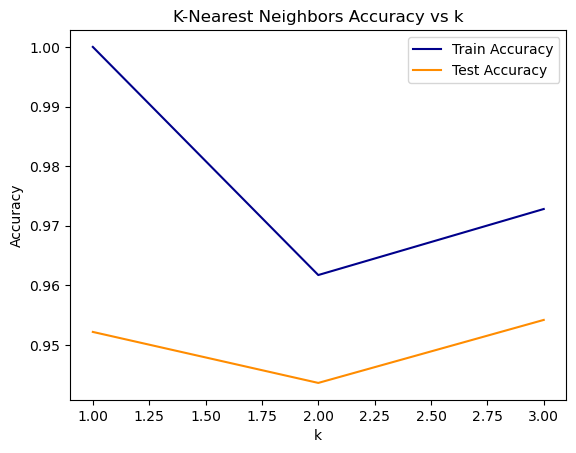

In [54]:
test_size = 0.40
LogReg(x, y, test_size= test_size, solver='liblinear')
print ('='*25)

NaiveBayes(x, y, test_size=test_size, model_type='gaussian')
print ('='*25)

NaiveBayes(x, y, test_size=test_size, model_type='multinomial')
print ('='*25)

KNN(x, y, test_size=test_size, k_max=3)
print ('='*25)

### Findings from the above models: <br>
#### 1. The NaiveBayes model did not have a good performance in any of the test sizes and it is not suitable for our data. <br> 2. Both LogReg and KNN had good performances, accuracy range is from 0.94 to 0.96. <br> 3. LogReg was less influenced by test size and it had almost the same performance in all test sizes. <br> 4. Although the accuracy of both models were acceptable, the confusion matrix shows far less number of false positive and false negatives for KNN. <br>


# 7. Enhancement of the Model Performance

### based on the information above, the best results were obtained by test size = 0.30 with KNN model. Now, we try to enhance it by changing the k_max

Accuracy of KNN Model for k=5: 0.9483221476510068
Training Accuracy: 0.957
Cross-Validation Score (mean): 0.943
Jaccard Similarity: 0.473
Precision: 0.92
Recall: 0.493
F1-Score: 0.642
Confusion Matrix:
 [[4475   14]
 [ 214  263]]


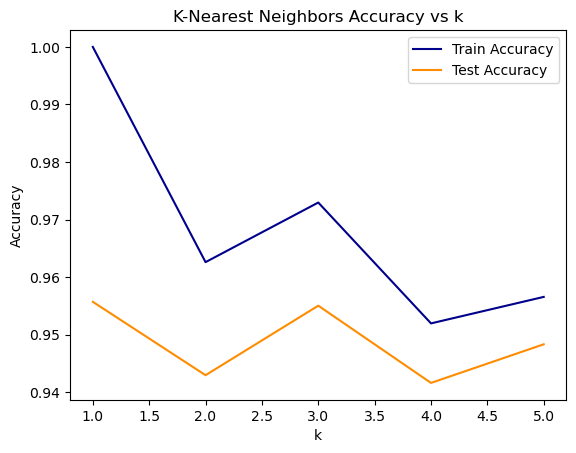

In [55]:
test_size = 0.30


KNN(x, y, test_size=test_size, k_max=5)


Accuracy of KNN Model for k=7: 0.9429530201342282
Training Accuracy: 0.949
Cross-Validation Score (mean): 0.94
Jaccard Similarity: 0.414
Precision: 0.923
Recall: 0.429
F1-Score: 0.585
Confusion Matrix:
 [[4474   15]
 [ 246  231]]


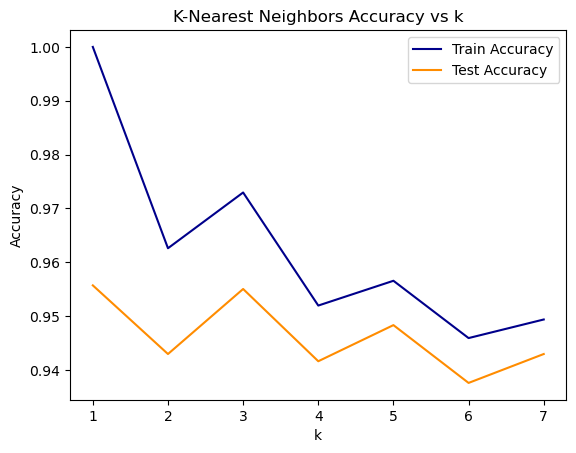

In [56]:
KNN(x, y, test_size=test_size, k_max=7)


Accuracy of KNN Model for k=10: 0.9375838926174497
Training Accuracy: 0.94
Cross-Validation Score (mean): 0.932
Jaccard Similarity: 0.35
Precision: 0.943
Recall: 0.357
F1-Score: 0.518
Confusion Matrix:
 [[4481    8]
 [ 295  182]]


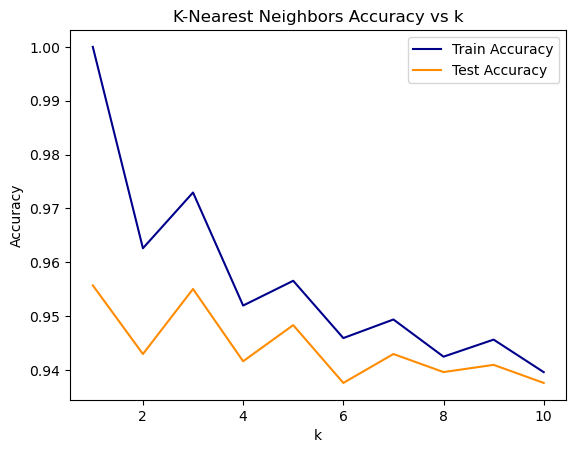

In [57]:
KNN(x, y, test_size=test_size, k_max=10)


### Based on the illustrations above and the value of accuracy, the best k_max is 3 and we consider it as our final model.